<a href="https://colab.research.google.com/github/vahid-nejad/LTMS_timeseries_forcasting/blob/main/stock_markert_forcast_with_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [ ]:
df=pd.read_csv("/dataset_GE.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-05-07,6.06,6.26,6.06,6.11,6.080704,100663300
1,2020-05-08,6.21,6.33,6.16,6.29,6.259841,93637300
2,2020-05-11,6.24,6.25,6.13,6.19,6.160320,71843000
3,2020-05-12,6.22,6.28,6.00,6.00,5.971231,95652200
4,2020-05-13,6.00,6.02,5.48,5.79,5.762238,235745300


In [ ]:
train_dates = pd.to_datetime(df['Date'])
train_dates

0     2020-05-07
1     2020-05-08
2     2020-05-11
3     2020-05-12
4     2020-05-13
         ...    
247   2021-04-30
248   2021-05-03
249   2021-05-04
250   2021-05-05
251   2021-05-06
Name: Date, Length: 252, dtype: datetime64[ns]

In [ ]:

#Variables for training
cols = list(df)[1:6]
train_df=df[cols].astype(float)
train_df.head()

,Open,High,Low,Close,Adj Close
0,6.06,6.26,6.06,6.11,6.080704
1,6.21,6.33,6.16,6.29,6.259841
2,6.24,6.25,6.13,6.19,6.160320
3,6.22,6.28,6.00,6.00,5.971231
4,6.00,6.02,5.48,5.79,5.762238


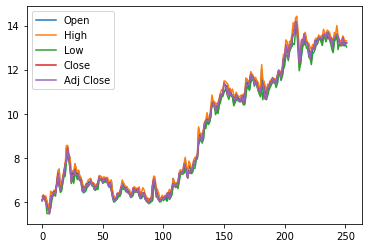

In [ ]:
df_for_plot=train_df.tail(5000)
df_for_plot.plot.line()

normilizing data

In [ ]:
scaler = StandardScaler()
scaler = scaler.fit(train_df)
scaled_train_df = scaler.transform(train_df)
scaled_train_df

array([[-1.15929186, -1.13529003, -1.11114896, -1.1367638 , -1.13862031],
       [-1.10470501, -1.11005913, -1.07427503, -1.07137339, -1.07373369],
       [-1.09378764, -1.13889444, -1.08533721, -1.1077014 , -1.10978197],
       ...,
       [ 1.48998998,  1.43465657,  1.47371331,  1.4098293 ,  1.41113868],
       [ 1.42448576,  1.39861243,  1.50689984,  1.4425245 ,  1.44373829],
       [ 1.4463205 ,  1.40582126,  1.45896374,  1.4425245 ,  1.44373829]])

In [ ]:
def prepareDateSet(timeSeriesData ,n_variables ,n_future=1, n_past=14):
    trainX = []
    trainY = []

  

    for i in range(n_past, len(timeSeriesData) - n_future +1):
        trainX.append(timeSeriesData[i - n_past:i, 0:n_variables])
        trainY.append(timeSeriesData[i + n_future - 1:i + n_future, 0:timeSeriesData.shape[1]])

    return np.array(trainX), np.array(trainY)

In [ ]:
train_x,y = prepareDateSet(timeSeriesData= scaled_train_df,n_variables= train_df.shape[1], n_future=1, n_past=14)
train_x

array([[[-1.15929186, -1.13529003, -1.11114896, -1.1367638 ,
         -1.13862031],
        [-1.10470501, -1.11005913, -1.07427503, -1.07137339,
         -1.07373369],
        [-1.09378764, -1.13889444, -1.08533721, -1.1077014 ,
         -1.10978197],
        ...,
        [-1.00644868, -1.05599294, -1.03371371, -1.02777979,
         -1.03047618],
        [-0.89363585, -0.89018993, -0.8419693 , -0.88610057,
         -0.88988854],
        [-0.72623618, -0.71357369, -0.73134751, -0.70809335,
         -0.71325262]],

       [[-1.10470501, -1.11005913, -1.07427503, -1.07137339,
         -1.07373369],
        [-1.09378764, -1.13889444, -1.08533721, -1.1077014 ,
         -1.10978197],
        [-1.10106589, -1.1280812 , -1.13327332, -1.1767246 ,
         -1.17827339],
        ...,
        [-0.89363585, -0.89018993, -0.8419693 , -0.88610057,
         -0.88988854],
        [-0.72623618, -0.71357369, -0.73134751, -0.70809335,
         -0.71325262],
        [-0.63889721, -0.69194721, -0.86040626, 

In [ ]:
y

array([[[-0.63889721, -0.69194721, -0.86040626, -0.89336617,
         -0.89709813]],

       [[-0.97733569, -0.96948702, -0.97102804, -0.96965498,
         -0.97279913]],

       [[-0.97005744, -0.93344289, -0.95259108, -0.90063177,
         -0.90430771]],

       ...,

       [[ 1.48998998,  1.43465657,  1.47371331,  1.4098293 ,
          1.41113868]],

       [[ 1.42448576,  1.39861243,  1.50689984,  1.4425245 ,
          1.44373829]],

       [[ 1.4463205 ,  1.40582126,  1.45896374,  1.4425245 ,
          1.44373829]]])

In [ ]:
print(train_x.shape)


(238, 14, 5)


In [ ]:
y=y.reshape((y.shape[0],y.shape[-1]))

In [ ]:
print(y.shape)

(238, 5)


In [ ]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(train_x.shape[1], train_x.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 14, 64)            17920     
_________________________________________________________________
lstm_9 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 165       
Total params: 30,501
Trainable params: 30,501
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(train_x, y, epochs=20, batch_size=16, validation_split=0.1, verbose=1)

Epoch 1/20
14/14 [==============================] - 0s 19ms/step - loss: 0.0260 - val_loss: 0.0181
Epoch 2/20
14/14 [==============================] - 0s 16ms/step - loss: 0.0289 - val_loss: 0.0064
Epoch 3/20
14/14 [==============================] - 0s 19ms/step - loss: 0.0262 - val_loss: 0.0042
Epoch 4/20
14/14 [==============================] - 0s 19ms/step - loss: 0.0325 - val_loss: 0.0118
Epoch 5/20
14/14 [==============================] - 0s 16ms/step - loss: 0.0234 - val_loss: 0.0062
Epoch 6/20
14/14 [==============================] - 0s 16ms/step - loss: 0.0245 - val_loss: 0.0179
Epoch 7/20
14/14 [==============================] - 0s 16ms/step - loss: 0.0293 - val_loss: 0.0039
Epoch 8/20
14/14 [==============================] - 0s 17ms/step - loss: 0.0268 - val_loss: 0.0113
Epoch 9/20
14/14 [==============================] - 0s 16ms/step - loss: 0.0257 - val_loss: 0.0036
Epoch 10/20
14/14 [==============================] - 0s 16ms/step - loss: 0.0284 - val_loss: 0.0405
Epoch 11/

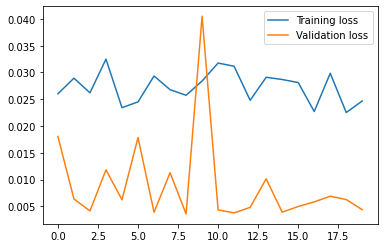

In [ ]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()


#Forcasting

In [ ]:
n_future=90  #Redefining n_future to extend prediction dates beyond original n_future dates...
forecast_period_dates = pd.date_range(list(train_dates)[-(n_future)], periods=n_future, freq='1d').tolist()

forecasts = model.predict(train_x[-(n_future):]) #forecast 

In [ ]:
forecast_period_dates

[Timestamp('2021-05-06 00:00:00', freq='D'),
 Timestamp('2021-05-07 00:00:00', freq='D'),
 Timestamp('2021-05-08 00:00:00', freq='D'),
 Timestamp('2021-05-09 00:00:00', freq='D'),
 Timestamp('2021-05-10 00:00:00', freq='D'),
 Timestamp('2021-05-11 00:00:00', freq='D'),
 Timestamp('2021-05-12 00:00:00', freq='D'),
 Timestamp('2021-05-13 00:00:00', freq='D'),
 Timestamp('2021-05-14 00:00:00', freq='D'),
 Timestamp('2021-05-15 00:00:00', freq='D'),
 Timestamp('2021-05-16 00:00:00', freq='D'),
 Timestamp('2021-05-17 00:00:00', freq='D'),
 Timestamp('2021-05-18 00:00:00', freq='D'),
 Timestamp('2021-05-19 00:00:00', freq='D'),
 Timestamp('2021-05-20 00:00:00', freq='D'),
 Timestamp('2021-05-21 00:00:00', freq='D'),
 Timestamp('2021-05-22 00:00:00', freq='D'),
 Timestamp('2021-05-23 00:00:00', freq='D'),
 Timestamp('2021-05-24 00:00:00', freq='D'),
 Timestamp('2021-05-25 00:00:00', freq='D'),
 Timestamp('2021-05-26 00:00:00', freq='D'),
 Timestamp('2021-05-27 00:00:00', freq='D'),
 Timestamp

In [ ]:
def makePredictions(numberOfPredictions, numberOfSteps, numberOfFeatures, timeSeriesData):
    inputData=list(timeSeriesData[-1,-numberOfSteps:])
    outPut=[]
    for i in range(numberOfPredictions):
        print("{}: steps{}".format(np.array(inputData),i))
        x_input=np.array(inputData).astype('float32').reshape(1,numberOfSteps,numberOfFeatures)
        
        y=model.predict(x_input)
        print("Y=====> : {}".format(y))
        outPut.append(y[0])
        inputData.append(list(y[0]))
        inputData=inputData[1:]
    return np.array(outPut)

In [ ]:
forecasts=makePredictions(n_future,14,5, train_x)

[[1.59552456 1.53918455 1.5769603  1.50791491 1.50893751]
 [1.48271173 1.46349187 1.51058724 1.53334451 1.53429276]
 [1.51546384 1.44186539 1.41102763 1.38803249 1.3894056 ]
 [1.34078592 1.43105215 1.36309153 1.49338371 1.49444879]
 [1.4936291  1.53918455 1.55114856 1.51518051 1.51618186]
 [1.54821596 1.51395365 1.5806477  1.56603972 1.56689237]
 [1.59552456 1.65452577 1.65070816 1.57330532 1.57413673]
 [1.54821596 1.48872276 1.41471503 1.54424291 1.5451593 ]
 [1.48635086 1.42023891 1.50321245 1.4388917  1.44011611]
 [1.43176401 1.39861243 1.4774007  1.4425245  1.44373829]
 [1.42448576 1.42023891 1.4774007  1.4098293  1.41113868]
 [1.45359875 1.48511835 1.51058724 1.52971171 1.53067058]
 [1.48998998 1.43465657 1.47371331 1.4098293  1.41113868]
 [1.42448576 1.39861243 1.50689984 1.4425245  1.44373829]]: steps0
Y=====> : [[1.4698505 1.4767811 1.4718336 1.4568412 1.4881753]]
[[1.48271173 1.46349187 1.51058724 1.53334451 1.53429276]
 [1.51546384 1.44186539 1.41102763 1.38803249 1.3894056 ]

In [ ]:
forecasts

array([[0.5552166 , 0.56087714, 0.5569263 , 0.5581545 , 0.5696579 ],
       [0.5453778 , 0.55046105, 0.547223  , 0.5483862 , 0.5601769 ],
       [0.5277117 , 0.53284216, 0.52991086, 0.53134984, 0.5435947 ],
       [0.5513211 , 0.556219  , 0.55283684, 0.55419713, 0.56543994],
       [0.5662367 , 0.5715138 , 0.5669481 , 0.56849825, 0.57878387],
       [0.51378745, 0.51966524, 0.5156772 , 0.5177587 , 0.5299678 ],
       [0.5503164 , 0.55553865, 0.55117875, 0.5526871 , 0.56330234],
       [0.70960885, 0.7170544 , 0.70609325, 0.70746535, 0.71195513],
       [0.74955434, 0.75988674, 0.74437755, 0.74557   , 0.7490851 ],
       [0.752945  , 0.76269317, 0.7474807 , 0.7471787 , 0.7518807 ],
       [0.7707979 , 0.7794419 , 0.76519686, 0.76354116, 0.76891345],
       [0.8963563 , 0.9053695 , 0.88785744, 0.8855161 , 0.88794196],
       [0.8658266 , 0.87598866, 0.85870296, 0.85608894, 0.8610888 ],
       [0.88707286, 0.89527106, 0.88032055, 0.8762014 , 0.8826769 ],
       [0.7897958 , 0.79697317, 0.

doing the reverse scaler to get data back to their original scale

In [ ]:
# forecast_copies = np.repeat(forecasts, train_df.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(forecasts)[:,0]

In [ ]:
forecast_dates = []
for time_i in forecast_period_dates:
    forecast_dates.append(time_i.date())



In [ ]:
y_pred_future


array([10.771323 , 10.744287 , 10.695742 , 10.760618 , 10.801605 ,
       10.657479 , 10.757857 , 11.19558  , 11.3053465, 11.314664 ,
       11.363722 , 11.708745 , 11.624852 , 11.683235 , 11.415926 ,
       11.540273 , 11.457035 , 11.220115 , 11.158094 , 11.07549  ,
       11.5241785, 11.247283 , 11.235382 , 10.897075 , 10.890505 ,
       11.1994   , 11.213645 , 11.396786 , 11.431974 , 11.583872 ,
       11.546715 , 11.481916 , 11.452318 , 11.691361 , 11.972448 ,
       11.874817 , 11.697051 , 12.032058 , 12.4903755, 12.555852 ,
       13.134697 , 12.797051 , 12.562184 , 13.290239 , 13.047727 ,
       13.491362 , 13.652359 , 13.45602  , 14.293295 , 13.732609 ,
       12.766854 , 12.14592  , 12.969806 , 13.490264 , 13.07802  ,
       13.570142 , 13.210427 , 13.125071 , 13.138712 , 12.671805 ,
       12.732262 , 12.869192 , 13.130223 , 12.955813 , 13.340844 ,
       13.202467 , 13.299162 , 13.547758 , 13.344625 , 13.357137 ,
       13.356347 , 13.693651 , 13.4927225, 13.294114 , 13.7305

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


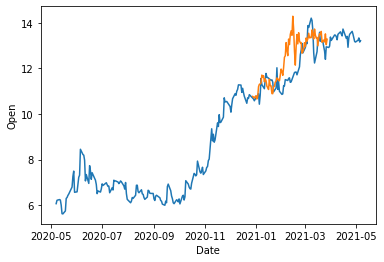

In [ ]:

    
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'Open':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])


original = df[['Date', 'Open']]
original['Date']=pd.to_datetime(original['Date'])
# original = original.loc[original['Date'] >= '2021-1-1']

sns.lineplot(original['Date'], original['Open'])
sns.lineplot(df_forecast['Date'], df_forecast['Open'])